# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 1.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

- Zapisz nazwy produktów w tablicy `N`.
- Zapisz ceny produktów w tablicy `C`.
- Zapisz podatek w tablicy `P`.

*(tablicy jedno wymiarowej czyli wektorze)*



In [1]:
from numpy import array


N = array(['Chleb', 'Butelka wody (1l)', 'Pomidor 1szt.', 'Olej (1l)', 'Szafran', 'Krewetki (opakowanie)', 'Lód (opakowanie)'])
C = array([3, 2, 2, 6, 1.5, 20, 5])
P = array([5, 8, 5, 5, 8, 23, 23])

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość).

In [2]:
z = array([2, 6, 0, 0, 0, 1, 0])


#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [3]:
from typing import NoReturn
from numpy import dot


def show_netto_value(prices: array, product_quantity: array) -> NoReturn:
    print(f'Klient zapłacił {dot(prices.T, product_quantity)} zł netto')


show_netto_value(
    prices=C,
    product_quantity=z
)

Klient zapłacił 38.0 zł netto


#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. W tym zadaniu możesz użyć operatora `*`.

Dodatkowo, wyświetl rachunek w postaci tabeli zawierającą kolumny: 
- nazwa produktu,
- cena netto, 
- liczba sztuk, 
- cena netto danej pozycji (cena netto x liczba sztuk), 
- podatek (procentowo np. `5%`),
- cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

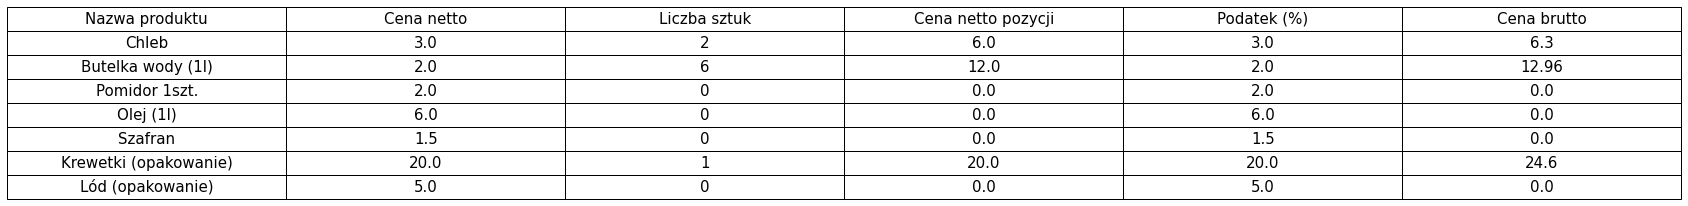

In [4]:
from matplotlib.pylab import subplots, table, show



def show_receipt(names: array, prices: array, product_quantity: array, taxes: array) -> NoReturn:
    labels = ['Nazwa produktu', 'Cena netto', 'Liczba sztuk', 'Cena netto pozycji', 'Podatek (%)', 'Cena brutto']

    rows = array([names, prices, product_quantity, prices * product_quantity, prices, prices * product_quantity + prices * product_quantity * (taxes / 100)]).T

    fig, ax = subplots(figsize=(15, 1))
    ax.set_axis_off()
    table_obj = table(
        cellText=rows,
        colLabels=labels,
        cellLoc='center',
        loc='center'
    )
    table_obj.set_fontsize(15)
    table_obj.scale(2, 2)

    show()

show_receipt(
    names=N,
    prices=C,
    product_quantity=z,
    taxes=P
)

### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv` a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1).

Klient zapłacił 432.0 zł netto


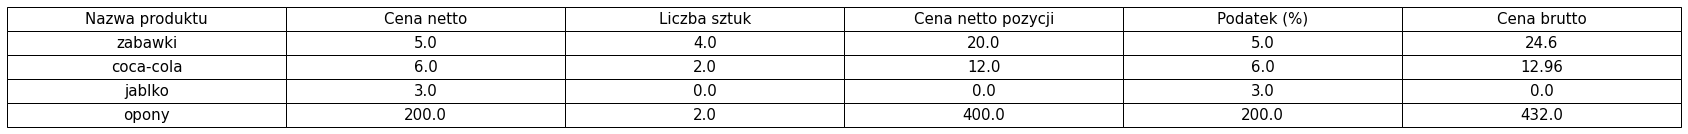

In [5]:
from typing import Tuple
from numpy import genfromtxt


def extract_data_from_products(data: array) -> Tuple:
    return data[:, 0], data[:, 1].astype(float), data[:, 2].astype(float)


product_quantity_path = './dataset/rachunek.csv'
products_path = './dataset/produkty.csv'

product_quantity = genfromtxt(product_quantity_path, delimiter=',')
products = genfromtxt(products_path, delimiter=',', dtype=str)

names, prices, taxes = extract_data_from_products(products)

show_netto_value(
    prices=prices,
    product_quantity=product_quantity
)

show_receipt(
    names=names,
    prices=prices,
    product_quantity=product_quantity,
    taxes=taxes
)

### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie różne od zera).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [6]:
A = array([1, 2])
B = array([5, 4])
C = A + B
C

array([6, 6])

#### Zadanie 3 B

Wyświetl na wykresie:
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

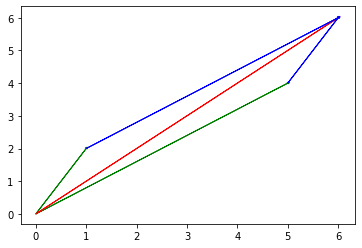

In [7]:
from matplotlib.pyplot import arrow

arrow(0, 0, A[0], A[1], head_width=0.05, head_length=0.05, color='g')
arrow(0, 0, B[0], B[1], head_width=0.05, head_length=0.05, color='g')
arrow(0, 0, C[0], C[1], head_width=0.05, head_length=0.05, color='r')
arrow(A[0], A[1], C[0] - A[0], C[1] - A[1], head_width=0.05, head_length=0.05, color='b')
arrow(B[0], B[1], C[0] - B[0], C[1] - B[1], head_width=0.05, head_length=0.05, color='b')

show()

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych (tj. poza brzegiem) tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

In [8]:
from numpy.random import normal


matrix = normal(100, 15, (8, 8)).astype(int)
matrix

array([[ 87,  90, 108,  79, 104, 100, 100, 106],
       [ 81,  96, 131,  96,  81, 100, 111,  68],
       [ 82, 101,  80,  95, 125, 101,  87,  86],
       [ 79,  91,  91,  72, 104,  98, 121,  99],
       [109,  70, 103, 116,  94, 115,  96, 100],
       [ 88,  79, 112,  82,  82, 103, 119, 108],
       [ 86, 120,  99, 101, 104,  97, 100, 111],
       [ 95,  84, 111,  88,  95, 103, 118,  93]])

In [16]:
from numpy import zeros, floor, average


filtered_matrix = zeros((6, 6), dtype=int)
for i in range(1, matrix.shape[0] - 1):
    for j in range(1, matrix.shape[1] - 1):
        filtered_matrix[i - 1, j - 1] = floor(average([
            matrix[i - 1, j - 1],   matrix[i - 1, j],   matrix[i - 1, j + 1],
            matrix[i,     j - 1],   matrix[i,     j],   matrix[i,     j + 1],
            matrix[i + 1, j - 1],   matrix[i + 1, j],   matrix[i + 1, j + 1]
        ]))

filtered_matrix

array([[ 95,  97,  99,  97, 101,  95],
       [ 92,  94,  97,  96, 103,  96],
       [ 89,  91,  97, 102, 104, 100],
       [ 91,  90,  95,  96, 103, 106],
       [ 96,  98,  99,  99, 101, 105],
       [ 97,  97,  97,  95, 102, 105]])